In [51]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from collections import Counter
import imblearn
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score
from sklearn.metrics import auc
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_validate
from matplotlib import pyplot
from sklearn.metrics import roc_curve
from numpy import argmax

# Data Preprocessing

In [2]:
#reading the data
raw = pd.read_csv('cgfinal414.csv')

In [3]:
raw = raw.drop(columns='id')

In [4]:
raw.columns.values

array(['StudyArm', 'Age', 'Gender', 'gradecat', 'incomecat', 'racecat',
       'Living', 'relationship_cat', 'GI_Lung', 'TTC3', 'TTC5', 'TTC6a',
       'TTC6b', 'TTC6c', 'TTC6d', 'distress', 'ImpairedPolypharmacy',
       'cognition', 'nutrition', 'phy_performance', 'function',
       'ImpairedCom', 'psychological', 'ImpairedMS', 'calcimpairedCom',
       'cgdistress', 'cggad7', 'cgphq2', 'SF12total', 'AGG_PHYS',
       'AGG_MENT'], dtype=object)

In [ ]:
# basic data descriptions

In [5]:
raw.describe()

,Age,Gender,gradecat,incomecat,racecat,Living,relationship_cat,GI_Lung,TTC3,TTC5,...,ImpairedCom,psychological,ImpairedMS,calcimpairedCom,cgdistress,cggad7,cgphq2,SF12total,AGG_PHYS,AGG_MENT
count,411.000000,411.000000,411.000000,410.000000,411.000000,410.000000,411.000000,413.000000,413.000000,413.000000,...,414.000000,414.000000,414.000000,411.000000,407.000000,397.000000,397.000000,396.000000,396.000000,396.000000
mean,66.508516,0.245742,2.566910,1.829268,1.138686,1.558537,1.428224,2.237288,1.946731,0.682809,...,0.632850,0.270531,0.219807,0.394161,0.434889,0.244332,0.188917,97.962075,46.904228,51.057848
std,12.460545,0.431051,0.626469,0.733496,0.439220,0.530477,0.667417,0.825483,0.337136,0.465947,...,0.482611,0.444772,0.414617,0.489265,0.496353,0.430233,0.391937,14.181896,10.517327,9.820425
min,26.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,55.783994,12.225440,16.156669
25%,58.000000,0.000000,2.000000,1.000000,1.000000,1.000000,1.000000,2.000000,2.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,88.817898,39.249191,46.036325
50%,69.000000,0.000000,3.000000,2.000000,1.000000,2.000000,1.000000,2.000000,2.000000,1.000000,...,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,102.186809,49.863908,54.085965
75%,75.000000,0.000000,3.000000,2.000000,1.000000,2.000000,2.000000,3.000000,2.000000,1.000000,...,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,109.616743,55.187162,57.993023
max,92.000000,1.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,119.095521,64.279280,68.397655


In [6]:
raw['AGG_PHYS'].max()

64.27928036899999

In [7]:
raw['AGG_PHYS'].min()

12.22543971

In [8]:
raw['AGG_PHYS'].mean()

46.904227762376266

In [9]:
raw['AGG_PHYS'].median()

49.8639078445

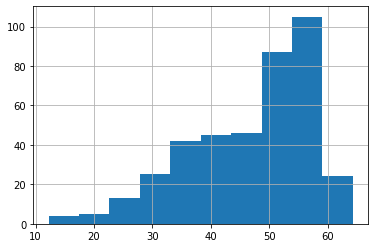

In [10]:
raw['AGG_PHYS'].hist()

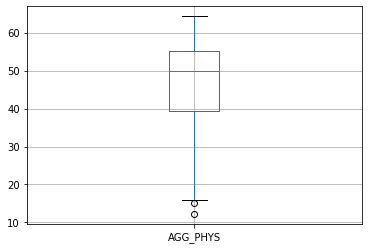

In [11]:
raw.boxplot(column=['AGG_PHYS'], return_type='axes');

In [12]:
#transforming the regression into classification
raw['AGG_PHYS_CAT']=pd.qcut(raw['AGG_PHYS'], q=[0, .25, 1.], labels=[1, 0])

In [13]:
raw

,StudyArm,Age,Gender,gradecat,incomecat,racecat,Living,relationship_cat,GI_Lung,TTC3,...,psychological,ImpairedMS,calcimpairedCom,cgdistress,cggad7,cgphq2,SF12total,AGG_PHYS,AGG_MENT,AGG_PHYS_CAT
0,GA,79.0,0.0,3.0,2.0,1.0,2.0,3.0,1.0,1.0,...,0,1,1.0,0.0,0.0,0.0,97.621803,44.810278,52.811526,0
1,GA,72.0,0.0,2.0,1.0,2.0,2.0,1.0,1.0,2.0,...,0,0,0.0,1.0,0.0,0.0,103.724460,59.985234,43.739225,0
2,GA,44.0,1.0,3.0,2.0,2.0,2.0,2.0,1.0,2.0,...,0,0,0.0,1.0,0.0,0.0,110.634352,51.428792,59.205560,0
3,GA,83.0,0.0,2.0,1.0,1.0,2.0,1.0,2.0,2.0,...,0,0,1.0,0.0,0.0,0.0,105.251983,45.896473,59.355510,0
4,Control,51.0,0.0,3.0,2.0,1.0,2.0,3.0,3.0,2.0,...,0,1,0.0,0.0,0.0,0.0,114.821701,57.760960,57.060741,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
409,GA,75.0,1.0,3.0,2.0,1.0,1.0,1.0,2.0,2.0,...,1,0,1.0,1.0,0.0,0.0,102.702713,58.715992,43.986721,0
410,GA,71.0,0.0,3.0,2.0,1.0,1.0,1.0,3.0,2.0,...,0,0,0.0,1.0,1.0,0.0,87.114771,33.603316,53.511456,1
411,GA,75.0,0.0,2.0,2.0,1.0,2.0,1.0,1.0,2.0,...,0,0,1.0,1.0,1.0,1.0,55.783994,15.928499,39.855495,1
412,GA,67.0,0.0,2.0,2.0,1.0,1.0,1.0,2.0,2.0,...,1,0,1.0,0.0,1.0,0.0,95.192964,47.181300,48.011665,0


In [14]:
raw1 = raw.dropna()

In [15]:
df_cgd=raw1

In [16]:

one_hot = pd.get_dummies(raw1['StudyArm'])
# Drop column B as it is now encoded
df_cgd = df_cgd.drop('StudyArm',axis = 1)
# Join the encoded df
df_cgd = df_cgd.join(one_hot)

one_hot = pd.get_dummies(df_cgd['incomecat'],prefix='incomecat')
# Drop column B as it is now encoded
df_cgd = df_cgd.drop('incomecat',axis = 1)
# Join the encoded df
df_cgd = df_cgd.join(one_hot)
df_cgd = df_cgd.drop('incomecat_3.0',axis = 1)
one_hot = pd.get_dummies(df_cgd['gradecat'],prefix='gradecat')
# Drop column B as it is now encoded
df_cgd = df_cgd.drop('gradecat',axis = 1)
# Join the encoded df
df_cgd = df_cgd.join(one_hot)

df_cgd = df_cgd.drop('gradecat_3.0',axis = 1)
one_hot = pd.get_dummies(df_cgd['relationship_cat'],prefix='relationship_cat')
# Drop column B as it is now encoded
df_cgd = df_cgd.drop('relationship_cat',axis = 1)
# Join the encoded df
df_cgd = df_cgd.join(one_hot)

df_cgd = df_cgd.drop('relationship_cat_3.0',axis = 1)
one_hot = pd.get_dummies(df_cgd['racecat'],prefix='race_cat')
# Drop column B as it is now encoded
df_cgd = df_cgd.drop('racecat',axis = 1)
# Join the encoded df
df_cgd = df_cgd.join(one_hot)

df_cgd = df_cgd.drop('race_cat_3.0',axis = 1)
one_hot = pd.get_dummies(df_cgd['TTC3'],prefix='TTC3')
# Drop column B as it is now encoded
df_cgd = df_cgd.drop('TTC3',axis = 1)
# Join the encoded df
df_cgd = df_cgd.join(one_hot)

df_cgd = df_cgd.drop('TTC3_3.0',axis = 1)
one_hot = pd.get_dummies(df_cgd['GI_Lung'],prefix='GI_Lung')
# Drop column B as it is now encoded
df_cgd = df_cgd.drop('GI_Lung',axis = 1)
# Join the encoded df
df_cgd = df_cgd.join(one_hot)

df_cgd = df_cgd.drop('GI_Lung_3.0',axis = 1)

In [17]:
raw1=df_cgd

In [18]:
raw1.columns.values

array(['Age', 'Gender', 'Living', 'TTC5', 'TTC6a', 'TTC6b', 'TTC6c',
       'TTC6d', 'distress', 'ImpairedPolypharmacy', 'cognition',
       'nutrition', 'phy_performance', 'function', 'ImpairedCom',
       'psychological', 'ImpairedMS', 'calcimpairedCom', 'cgdistress',
       'cggad7', 'cgphq2', 'SF12total', 'AGG_PHYS', 'AGG_MENT',
       'AGG_PHYS_CAT', 'Control', 'GA', 'incomecat_1.0', 'incomecat_2.0',
       'gradecat_1.0', 'gradecat_2.0', 'relationship_cat_1.0',
       'relationship_cat_2.0', 'race_cat_1.0', 'race_cat_2.0', 'TTC3_1.0',
       'TTC3_2.0', 'GI_Lung_1.0', 'GI_Lung_2.0'], dtype=object)

In [19]:
from sklearn.model_selection import train_test_split

In [20]:
#select features
X=raw1[['Age', 'Gender', 'Living', 'TTC5', 'TTC6a', 'TTC6b', 'TTC6c',
       'TTC6d', 'distress', 'ImpairedPolypharmacy', 'cognition',
       'nutrition', 'phy_performance', 'function', 'ImpairedCom',
       'psychological', 'ImpairedMS', 'calcimpairedCom',
       'Control', 'incomecat_1.0', 'incomecat_2.0',
       'gradecat_1.0', 'gradecat_2.0', 'relationship_cat_1.0',
       'relationship_cat_2.0', 'race_cat_1.0', 'race_cat_2.0', 'TTC3_1.0',
       'TTC3_2.0', 'GI_Lung_1.0', 'GI_Lung_2.0']]
y=raw1['AGG_PHYS_CAT']

In [21]:
#split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=22,stratify=y)

In [22]:
X_train.shape
print(sorted(Counter(y_train).items()))

print(sorted(Counter(y_test).items()))

[(0, 214), (1, 71)]
[(0, 71), (1, 24)]


In [23]:
X_train.shape
print(sorted(Counter(y_train).items()))

print(sorted(Counter(y_test).items()))

[(0, 214), (1, 71)]
[(0, 71), (1, 24)]


In [24]:
X_test.shape

(95, 31)

In [25]:
y_test.shape

(95,)

In [26]:
X_test

,Age,Gender,Living,TTC5,TTC6a,TTC6b,TTC6c,TTC6d,distress,ImpairedPolypharmacy,...,gradecat_1.0,gradecat_2.0,relationship_cat_1.0,relationship_cat_2.0,race_cat_1.0,race_cat_2.0,TTC3_1.0,TTC3_2.0,GI_Lung_1.0,GI_Lung_2.0
379,58.0,0.0,2.0,0.0,0.0,1.0,1.0,0.0,0.0,1,...,0,0,0,0,1,0,0,1,0,0
309,59.0,0.0,2.0,0.0,1.0,0.0,0.0,0.0,0.0,1,...,0,1,0,1,0,0,0,1,1,0
281,76.0,0.0,2.0,0.0,0.0,1.0,1.0,0.0,0.0,1,...,0,1,1,0,0,1,0,1,0,0
170,82.0,0.0,2.0,1.0,1.0,0.0,0.0,0.0,0.0,1,...,0,0,1,0,1,0,0,1,0,0
293,64.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,1,...,0,1,0,1,1,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,85.0,1.0,2.0,0.0,0.0,0.0,1.0,0.0,0.0,1,...,0,0,1,0,1,0,0,1,0,1
216,57.0,0.0,3.0,1.0,0.0,0.0,0.0,0.0,1.0,1,...,0,1,1,0,1,0,0,1,0,1
179,60.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1,...,1,0,0,0,1,0,0,1,0,1
117,72.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0,...,0,0,1,0,1,0,0,1,0,1


Text(0.5, 1.0, 'Class Distributions \n (0: Negative || 1: Positive)')

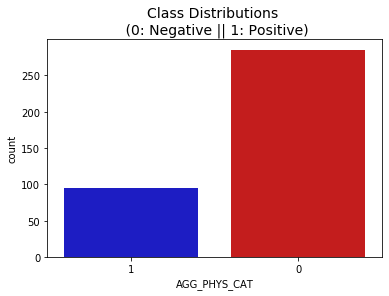

In [124]:
import seaborn as sns
colors = ["#0101DF", "#DF0101"]

sns.countplot('AGG_PHYS_CAT', data=raw1, palette=colors)
plt.title('Class Distributions \n (0: Negative || 1: Positive)', fontsize=14)

In [125]:
y.shape

(380,)

In [30]:
print(sorted(Counter(y).items()))

[(0, 285), (1, 95)]


In [31]:
raw2=X
raw2['AGG_PHYS_CAT']=y

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


# Smoting the data & PCA

In [32]:
from imblearn.over_sampling import SMOTE # doctest: +NORMALIZE_WHITESPACE
from collections import Counter

In [33]:
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline

from imblearn.over_sampling import BorderlineSMOTE
from imblearn.over_sampling import SVMSMOTE

from imblearn.over_sampling import KMeansSMOTE
over = SVMSMOTE(random_state=0)

T-SNE took 2.5 s
PCA took 0.0029 s
Truncated SVD took 0.0041 s


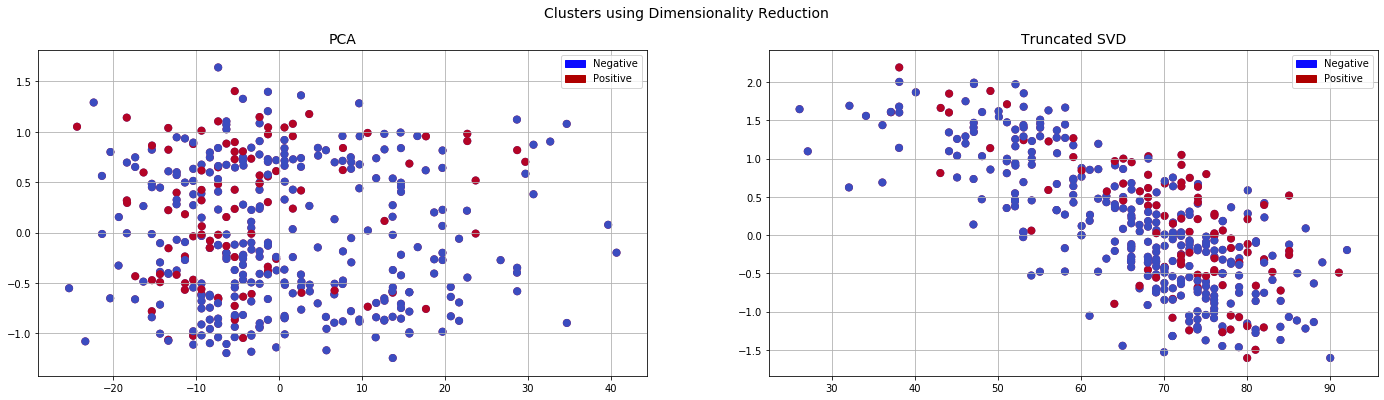

In [34]:
import time

from sklearn.manifold import TSNE
from sklearn.decomposition import PCA, TruncatedSVD
# New_df is from the random undersample data (fewer instances)
X = raw2.drop('AGG_PHYS_CAT', axis=1)
y = raw2['AGG_PHYS_CAT']


# T-SNE Implementation
t0 = time.time()
X_reduced_tsne = TSNE(n_components=2, random_state=42).fit(X.values)
t1 = time.time()
print("T-SNE took {:.2} s".format(t1 - t0))

# PCA Implementation
t0 = time.time()
X_reduced_pca = PCA(n_components=2, random_state=42).fit_transform(X.values)
t1 = time.time()
print("PCA took {:.2} s".format(t1 - t0))

# TruncatedSVD
t0 = time.time()
X_reduced_svd = TruncatedSVD(n_components=2, algorithm='randomized', random_state=42).fit_transform(X.values)
t1 = time.time()
print("Truncated SVD took {:.2} s".format(t1 - t0))

import matplotlib.patches as mpatches
f, (ax2, ax3) = plt.subplots(1, 2, figsize=(24,6))
# labels = ['No Fraud', 'Fraud']
f.suptitle('Clusters using Dimensionality Reduction', fontsize=14)


blue_patch = mpatches.Patch(color='#0A0AFF', label='Negative')
red_patch = mpatches.Patch(color='#AF0000', label='Positive')


# # t-SNE scatter plot
# ax1.scatter(X_reduced_tsne[:,0], X_reduced_tsne[:,1], c=(y == 0), cmap='coolwarm', label='No Fraud', linewidths=2)
# ax1.scatter(X_reduced_tsne[:,0], X_reduced_tsne[:,1], c=(y == 1), cmap='coolwarm', label='Fraud', linewidths=2)
# ax1.set_title('t-SNE', fontsize=14)

# ax1.grid(True)

# ax1.legend(handles=[blue_patch, red_patch])


# PCA scatter plot
ax2.scatter(X_reduced_pca[:,0], X_reduced_pca[:,1], c=(y == 0), cmap='coolwarm', label='Neg', linewidths=2)
ax2.scatter(X_reduced_pca[:,0], X_reduced_pca[:,1], c=(y == 1), cmap='coolwarm', label='Pos', linewidths=2)
ax2.set_title('PCA', fontsize=14)

ax2.grid(True)

ax2.legend(handles=[blue_patch, red_patch])

# TruncatedSVD scatter plot
ax3.scatter(X_reduced_svd[:,0], X_reduced_svd[:,1], c=(y == 0), cmap='coolwarm', label='Neg', linewidths=2)
ax3.scatter(X_reduced_svd[:,0], X_reduced_svd[:,1], c=(y == 1), cmap='coolwarm', label='Pos', linewidths=2)
ax3.set_title('Truncated SVD', fontsize=14)

ax3.grid(True)

ax3.legend(handles=[blue_patch, red_patch])

plt.show()

In [35]:
# X_train1,y_train1 = over.fit_sample(X,y)
X_train1,y_train1 = over.fit_resample(X, y)
print(sorted(Counter(y_train1).items()))

[(0, 285), (1, 285)]


In [36]:

# from imblearn.combine import SMOTETomek
# # smote_tomek = SMOTETomek(random_state=0)

# X_train3,y_train3= smote_tomek.fit_resample(X,y)

# print(sorted(Counter(y_train3).items()))

In [37]:
X.shape

(380, 31)

In [38]:
new_df=X_train1
new_df['AGG_PHYS_CAT']=y_train1


In [39]:
import time

from sklearn.manifold import TSNE
from sklearn.decomposition import PCA, TruncatedSVD
# New_df is from the random undersample data (fewer instances)
X = new_df.drop('AGG_PHYS_CAT', axis=1)
y = new_df['AGG_PHYS_CAT']
# T-SNE Implementation
t0 = time.time()
X_reduced_tsne = TSNE(n_components=2, random_state=42).fit(X.values)
t1 = time.time()
print("T-SNE took {:.2} s".format(t1 - t0))

# PCA Implementation
t0 = time.time()
X_reduced_pca = PCA(n_components=2, random_state=42).fit_transform(X.values)
t1 = time.time()
print("PCA took {:.2} s".format(t1 - t0))

# TruncatedSVD
t0 = time.time()
X_reduced_svd = TruncatedSVD(n_components=2, algorithm='randomized', random_state=42).fit_transform(X.values)
t1 = time.time()
print("Truncated SVD took {:.2} s".format(t1 - t0))

T-SNE took 3.7 s
PCA took 0.0041 s
Truncated SVD took 0.0036 s


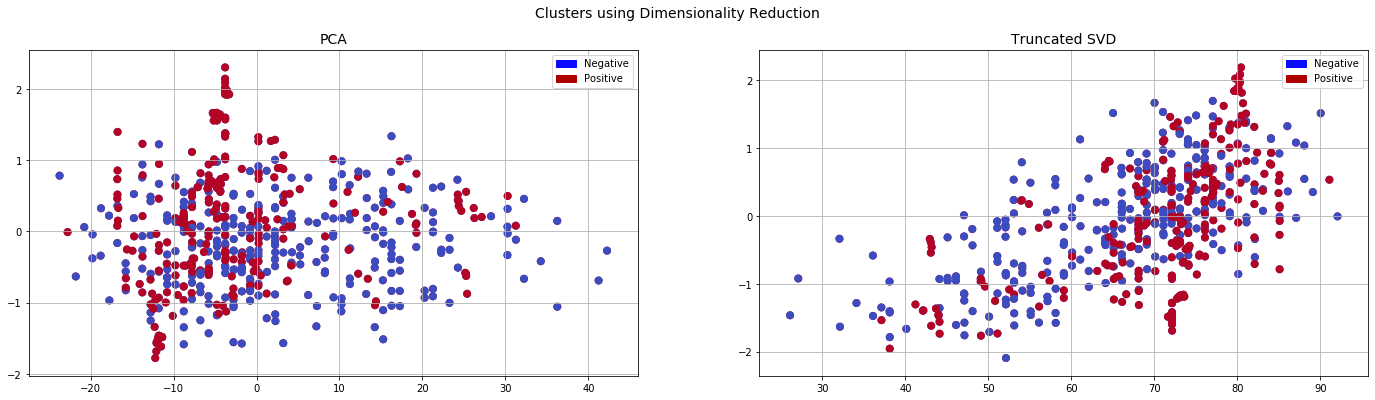

In [40]:

import matplotlib.patches as mpatches
f, (ax2, ax3) = plt.subplots(1, 2, figsize=(24,6))
# labels = ['No Fraud', 'Fraud']
f.suptitle('Clusters using Dimensionality Reduction', fontsize=14)


blue_patch = mpatches.Patch(color='#0A0AFF', label='Negative')
red_patch = mpatches.Patch(color='#AF0000', label='Positive')


# # t-SNE scatter plot
# ax1.scatter(X_reduced_tsne[:,0], X_reduced_tsne[:,1], c=(y == 0), cmap='coolwarm', label='No Fraud', linewidths=2)
# ax1.scatter(X_reduced_tsne[:,0], X_reduced_tsne[:,1], c=(y == 1), cmap='coolwarm', label='Fraud', linewidths=2)
# ax1.set_title('t-SNE', fontsize=14)

# ax1.grid(True)

# ax1.legend(handles=[blue_patch, red_patch])


# PCA scatter plot
ax2.scatter(X_reduced_pca[:,0], X_reduced_pca[:,1], c=(y == 0), cmap='coolwarm', label='Negative', linewidths=2)
ax2.scatter(X_reduced_pca[:,0], X_reduced_pca[:,1], c=(y == 1), cmap='coolwarm', label='Positive', linewidths=2)
ax2.set_title('PCA', fontsize=14)

ax2.grid(True)

ax2.legend(handles=[blue_patch, red_patch])

# TruncatedSVD scatter plot
ax3.scatter(X_reduced_svd[:,0], X_reduced_svd[:,1], c=(y == 0), cmap='coolwarm', label='Negative', linewidths=2)
ax3.scatter(X_reduced_svd[:,0], X_reduced_svd[:,1], c=(y == 1), cmap='coolwarm', label='Positive', linewidths=2)
ax3.set_title('Truncated SVD', fontsize=14)

ax3.grid(True)

ax3.legend(handles=[blue_patch, red_patch])

plt.show()

In [41]:
# from numpy import mean
# from sklearn.model_selection import cross_val_score
# from sklearn.model_selection import RepeatedStratifiedKFold
# from sklearn.tree import DecisionTreeClassifier

# # define model
# model1 = DecisionTreeClassifier()
# # evaluate pipeline
# cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
# scores = cross_val_score(model1, X_train, y_train, scoring='accuracy', cv=cv, n_jobs=-1)
# print('Mean ROC AUC: %.3f' % mean(scores))
X=raw1[['Age', 'Gender', 'Living', 'TTC5', 'TTC6a', 'TTC6b', 'TTC6c',
       'TTC6d', 'distress', 'ImpairedPolypharmacy', 'cognition',
       'nutrition', 'phy_performance', 'function', 'ImpairedCom',
       'psychological', 'ImpairedMS', 'calcimpairedCom',
       'Control', 'incomecat_1.0', 'incomecat_2.0',
       'gradecat_1.0', 'gradecat_2.0', 'relationship_cat_1.0',
       'relationship_cat_2.0', 'race_cat_1.0', 'race_cat_2.0', 'TTC3_1.0',
       'TTC3_2.0', 'GI_Lung_1.0', 'GI_Lung_2.0']]
y=raw1['AGG_PHYS_CAT']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42,stratify=y)

In [54]:
def get_best_threshold(testy,yhat):
    fpr, tpr, thresholds = roc_curve(testy, yhat)
    # get the best threshold
    J = tpr - fpr
    ix = argmax(J)
    best_thresh = thresholds[ix]
    print('Best Threshold=%f' % (best_thresh))
    return best_thresh

### Logistic Regression Tuning

In [42]:
from sklearn.model_selection import GridSearchCV
from imblearn.over_sampling import SMOTE # doctest: +NORMALIZE_WHITESPACE
from sklearn.linear_model import LogisticRegression
# Create the parameter grid based on the results of random search 
from imblearn.pipeline import Pipeline
modelrf = Pipeline([
        ('lgr',  LogisticRegression(random_state=42,class_weight = {0:1,1:(285/95)}))
    ])

param_grid = {

}
# Create a based model

# Instantiate the grid search model
grid_searchlgr = GridSearchCV(estimator = modelrf, param_grid = param_grid,scoring='f1',return_train_score=True,  
                          cv = 5, n_jobs = -1)

In [43]:
grid_searchlgr.fit(X_train, y_train)
grid_searchlgr.best_params_

/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


{}

In [44]:
grid_searchlgr.best_score_

0.4595482295482295

In [45]:
# Visualise classical Confusion Matrix
from sklearn.metrics import confusion_matrix
lgrres = grid_searchlgr.predict(X_test)
CMlgr = confusion_matrix(y_test, lgrres)
print(CMlgr)

[[50 21]
 [12 12]]


In [46]:
#changing the prediction threshold

In [47]:
from sklearn.metrics import confusion_matrix
lgrres = grid_searchlgr.predict_proba(X_test)
lgrres=(lgrres[:,1]>=0.41).astype(int)
lg_cm = confusion_matrix(y_test,lgrres)
print(lg_cm)

[[40 31]
 [10 14]]


In [ ]:
from mlxtend.plotting import plot_confusion_matrix
import numpy as np
binary = np.array([[40,31],
 [ 10, 14]])

fig, ax = plot_confusion_matrix(conf_mat=binary,
                                show_absolute=True,
                                show_normed=True,
                                colorbar=True)
plt.title("LogisticRegression CM")
plt.show()

### RandomForest Tuning

In [49]:
from sklearn.model_selection import GridSearchCV
from imblearn.over_sampling import SMOTE # doctest: +NORMALIZE_WHITESPACE
from sklearn.ensemble import RandomForestClassifier

# Create the parameter grid based on the results of random search 
from imblearn.pipeline import Pipeline
modelrf = Pipeline([
        ('rf', RandomForestClassifier(random_state=42,class_weight = {0:1,1:(285/95)}))
    ])

param_grid = {
    'rf__max_depth': [10,20,40,60],
    'rf__max_features': [0.07,0.13,0.15,0.25],
    'rf__min_samples_split': [2,3,5,8,12],
    'rf__min_samples_leaf': [1,2,4,8],
    'rf__n_estimators': [10,25,45, 60,110,148,200],
    'rf__bootstrap': [True, False]
}

# Create a based model

# Instantiate the grid search model
grid_searchrf = GridSearchCV(estimator = modelrf, param_grid = param_grid,scoring='f1',return_train_score=True,  
                          cv = 5, n_jobs = -1,verbose=5)

In [61]:
from sklearn.model_selection import GridSearchCV
from imblearn.over_sampling import SMOTE # doctest: +NORMALIZE_WHITESPACE
from sklearn.ensemble import RandomForestClassifier

# Create the parameter grid based on the results of random search 
from imblearn.pipeline import Pipeline
modelrf = Pipeline([
        ('rf', RandomForestClassifier(random_state=42,class_weight = {0:1,1:(285/95)}))
    ])

param_grid ={'rf__bootstrap': [True],
 'rf__max_depth': [10],
 'rf__max_features': [0.25,0.2,'sqrt'],
 'rf__min_samples_leaf': [8],
 'rf__min_samples_split': [2],
 'rf__n_estimators': [200]}
# Create a based model

# Instantiate the grid search model
grid_searchrf = GridSearchCV(estimator = modelrf, param_grid = param_grid,scoring='f1',return_train_score=True,  
                          cv = 5, n_jobs = -1,verbose=5)

In [62]:
grid_searchrf.fit(X_train, y_train)
grid_searchrf.best_params_

Fitting 5 folds for each of 3 candidates, totalling 15 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   4 out of  15 | elapsed:    5.9s remaining:   16.5s
[Parallel(n_jobs=-1)]: Done   8 out of  15 | elapsed:    6.0s remaining:    5.2s
[Parallel(n_jobs=-1)]: Done  12 out of  15 | elapsed:    6.0s remaining:    1.4s
[Parallel(n_jobs=-1)]: Done  15 out of  15 | elapsed:    6.4s finished


{'rf__bootstrap': True,
 'rf__max_depth': 10,
 'rf__max_features': 0.25,
 'rf__min_samples_leaf': 8,
 'rf__min_samples_split': 2,
 'rf__n_estimators': 200}

In [ ]:
# {'rf__bootstrap': True,
#  'rf__max_depth': 10,
#  'rf__max_features': 0.25,
#  'rf__min_samples_leaf': 8,
#  'rf__min_samples_split': 2,
#  'rf__n_estimators': 200}

In [63]:
grid_searchrf.best_score_

0.5114430860881165

In [64]:
grid_searchrf.score(X_test,y_test)

0.4827586206896552

In [53]:
df_rf = pd.DataFrame(grid_searchrf.cv_results_)
df_rf.to_excel("result_rf.xlsx")

In [65]:
# Visualise classical Confusion M0atrix
from sklearn.metrics import confusion_matrix
rfres = grid_searchrf.predict(X_test)

rf_cm = confusion_matrix(y_test, rfres)

print(rf_cm)

[[51 20]
 [10 14]]


In [135]:
X.columns.values

array(['Age', 'Gender', 'Living', 'TTC5', 'TTC6a', 'TTC6b', 'TTC6c',
       'TTC6d', 'distress', 'ImpairedPolypharmacy', 'cognition',
       'nutrition', 'phy_performance', 'function', 'ImpairedCom',
       'psychological', 'ImpairedMS', 'calcimpairedCom', 'Control',
       'incomecat_1.0', 'incomecat_2.0', 'gradecat_1.0', 'gradecat_2.0',
       'relationship_cat_1.0', 'relationship_cat_2.0', 'race_cat_1.0',
       'race_cat_2.0', 'TTC3_1.0', 'TTC3_2.0', 'GI_Lung_1.0',
       'GI_Lung_2.0'], dtype=object)

In [136]:
grid_searchrf.best_estimator_.named_steps["rf"].feature_importances_

array([0.15721372, 0.021118  , 0.0275524 , 0.0232563 , 0.01578499,
       0.00931793, 0.01041971, 0.00250971, 0.03805491, 0.01797752,
       0.01583745, 0.02447452, 0.00481257, 0.03927299, 0.04460785,
       0.04772857, 0.0115182 , 0.26424469, 0.04918966, 0.04118813,
       0.03206699, 0.00349513, 0.01580593, 0.0156423 , 0.01750753,
       0.00322036, 0.00053282, 0.00319493, 0.004121  , 0.02097585,
       0.01735732])

In [66]:
from sklearn.metrics import confusion_matrix
rfrr= grid_searchrf.predict_proba(X_test)
rfrr_thres=get_best_threshold(y_test,rfrr[:,1])
rfrr=(rfrr[:,1]>=rfrr_thres).astype(int)
rfrr_cm = confusion_matrix(y_test,rfrr)
print(rfrr_cm)

Best Threshold=0.405361
[[46 25]
 [ 6 18]]


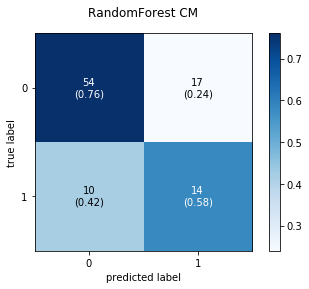

In [55]:
from mlxtend.plotting import plot_confusion_matrix
binary = np.array([[54 ,17],
 [10, 14]])

fig, ax = plot_confusion_matrix(conf_mat=binary,
                                show_absolute=True,
                                show_normed=True,
                                colorbar=True)
plt.title("RandomForest CM")
plt.show()

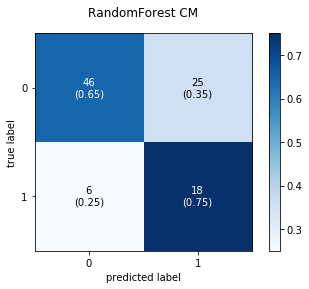

In [67]:
from mlxtend.plotting import plot_confusion_matrix
binary = np.array([[46 ,25],
 [ 6 ,18]])

fig, ax = plot_confusion_matrix(conf_mat=binary,
                                show_absolute=True,
                                show_normed=True,
                                colorbar=True)
plt.title("RandomForest CM")
plt.show()

### SVM Tuning

In [56]:
from sklearn.svm import SVC 

from sklearn.model_selection import GridSearchCV
modelsvm = SVC(random_state=42, verbose=2,probability=True, class_weight = {0:1,1:(285/95)})



param_gridsvm = {'C': [0.1, 1, 10,20,50, 100,200,500,1000, 0.01, 0.05, 0.001,0.005, 0.0001,0.0005],  
              'gamma': [10,20,50, 100,200,500,1000,1,0.5, 0.1, 0.01, 0.05, 0.001,0.005, 0.0001,0.0005], 
              'kernel': ['rbf']}  


svmgridsearch = GridSearchCV(estimator=modelsvm, param_grid=param_gridsvm, n_jobs=-1, 
                             cv=5, verbose=2, return_train_score=True,scoring="f1")

In [57]:
svmgridsearch.fit(X_train,y_train)
svmgridsearch.best_params_

Fitting 5 folds for each of 240 candidates, totalling 1200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  58 tasks      | elapsed:    1.5s
[Parallel(n_jobs=-1)]: Done 300 tasks      | elapsed:    7.1s
[Parallel(n_jobs=-1)]: Done 706 tasks      | elapsed:   17.5s


[LibSVM]

[Parallel(n_jobs=-1)]: Done 1200 out of 1200 | elapsed:   28.8s finished


{'C': 500, 'gamma': 0.0001, 'kernel': 'rbf'}

In [58]:
svmgridsearch.best_score_

0.541930501930502

In [59]:
svmgridsearch.score(X_test,y_test)

0.45901639344262296

In [60]:
df_gridsearchsvm = pd.DataFrame(svmgridsearch.cv_results_)
df_gridsearchsvm.to_excel("result_svm.xlsx")

In [ ]:
from sklearn.metrics import confusion_matrix
svmr= svmgridsearch.predict_proba(X_test)
svmr_thres=get_best_threshold(y_test,rfrr[:,1])
svmr=(svmr[:,1]>=rfrr_thres).astype(int)
rfrr_cm = confusion_matrix(y_test,rfrr)
print(rfrr_cm)

In [61]:
# Visualise classical Confusion M0atrix
from sklearn.metrics import confusion_matrix
svm = svmgridsearch.predict(X_test)
svm_cm = confusion_matrix(y_test, svm)

print(svm_cm)

[[48 23]
 [10 14]]


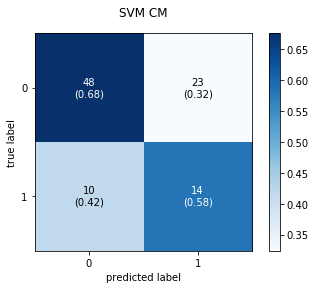

In [62]:
from mlxtend.plotting import plot_confusion_matrix
binary = np.array([[48 ,23],
 [10, 14]])

fig, ax = plot_confusion_matrix(conf_mat=binary,
                                show_absolute=True,
                                show_normed=True,
                                colorbar=True)
plt.title("SVM CM")
plt.show()

### AdaBoost Tuning

In [28]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import GridSearchCV

ada=AdaBoostClassifier()
param_dist = {
 'n_estimators': list(np.arange(50,2000,50)),
 'learning_rate' : [0.001,0.002,0.005,0.009,0.01,0.02,0.05,0.09,0.1,0.2,0.5,0.9,1]
 }

# Instantiate the grid search model
grid_search_ABR = GridSearchCV(estimator=ada,param_grid=param_dist,cv=3,n_jobs=-1,scoring='f1',verbose=3)

In [29]:
grid_search_ABR.fit(X_train, y_train)
grid_search_ABR.best_params_

Fitting 3 folds for each of 507 candidates, totalling 1521 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed:    2.3s
[Parallel(n_jobs=-1)]: Done 104 tasks      | elapsed:   22.4s
[Parallel(n_jobs=-1)]: Done 264 tasks      | elapsed:   51.0s
[Parallel(n_jobs=-1)]: Done 488 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done 776 tasks      | elapsed:  2.7min
[Parallel(n_jobs=-1)]: Done 1128 tasks      | elapsed:  3.9min
[Parallel(n_jobs=-1)]: Done 1521 out of 1521 | elapsed:  5.4min finished


{'learning_rate': 0.5, 'n_estimators': 50}

In [30]:
grid_search_ABR.best_score_

0.3123788977447514

In [31]:
grid_search_ABR.score(X_test,y_test)

0.4390243902439025

In [67]:
df_gridsearchabr = pd.DataFrame(grid_search_ABR.cv_results_)
df_gridsearchabr.to_excel("result_abr.xlsx")

In [32]:
# Visualise classical Confusion M0atrix
from sklearn.metrics import confusion_matrix
abr = grid_search_ABR.predict(X_test)
abr_cm = confusion_matrix(y_test, abr)

print(abr_cm)

[[63  8]
 [15  9]]


In [58]:
from sklearn.metrics import confusion_matrix
abrr = grid_search_ABR.predict_proba(X_test)
abrr_thres=get_best_threshold(y_test,abrr[:,1])
abrr=(abrr[:,1]>=abrr_thres).astype(int)
abrr_cm = confusion_matrix(y_test,abrr)
print(abrr_cm)

Best Threshold=0.486383
[[50 21]
 [ 6 18]]


In [137]:
X.columns.values

array(['Age', 'Gender', 'Living', 'TTC5', 'TTC6a', 'TTC6b', 'TTC6c',
       'TTC6d', 'distress', 'ImpairedPolypharmacy', 'cognition',
       'nutrition', 'phy_performance', 'function', 'ImpairedCom',
       'psychological', 'ImpairedMS', 'calcimpairedCom', 'Control',
       'incomecat_1.0', 'incomecat_2.0', 'gradecat_1.0', 'gradecat_2.0',
       'relationship_cat_1.0', 'relationship_cat_2.0', 'race_cat_1.0',
       'race_cat_2.0', 'TTC3_1.0', 'TTC3_2.0', 'GI_Lung_1.0',
       'GI_Lung_2.0'], dtype=object)

In [128]:
 grid_search_ABR.best_estimator_.feature_importances_

array([0.32, 0.02, 0.06, 0.  , 0.04, 0.  , 0.  , 0.02, 0.04, 0.04, 0.  ,
       0.  , 0.  , 0.02, 0.06, 0.02, 0.02, 0.08, 0.06, 0.06, 0.  , 0.  ,
       0.  , 0.02, 0.02, 0.  , 0.02, 0.02, 0.  , 0.04, 0.02])

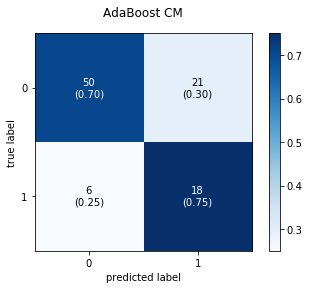

In [60]:
from mlxtend.plotting import plot_confusion_matrix
binary = np.array([[50 ,21],
 [ 6 ,18]])

fig, ax = plot_confusion_matrix(conf_mat=binary,
                                show_absolute=True,
                                show_normed=True,
                                colorbar=True)
plt.title("AdaBoost CM")
plt.show()

### KNN Tuning

In [108]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

param_grid_knn = {
    'leaf_size':list(np.arange(1,30,1)),
    'n_neighbors':list(np.arange(1,30,1)),
    'metric':['euclidean','manhattan']
}

grid_search_knn= GridSearchCV(KNeighborsClassifier(),param_grid=param_grid_knn,verbose=1,cv=5,n_jobs=-1,scoring="f1")

In [109]:
grid_search_knn.fit(X_train, y_train)
grid_search_knn.best_params_

Fitting 5 folds for each of 1682 candidates, totalling 8410 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 1640 tasks      | elapsed:    2.1s
[Parallel(n_jobs=-1)]: Done 5640 tasks      | elapsed:    6.6s
[Parallel(n_jobs=-1)]: Done 8410 out of 8410 | elapsed:    9.8s finished


{'leaf_size': 2, 'metric': 'manhattan', 'n_neighbors': 3}

In [110]:
grid_search_knn.best_score_

0.4317938286817006

In [111]:
grid_search_knn.score(X_test,y_test)

0.4

In [112]:
# Visualise classical Confusion M0atrix
from sklearn.metrics import confusion_matrix
knn_grid = grid_search_knn.predict(X_test)
knn_cm = confusion_matrix(y_test, knn_grid)

print(knn_cm)

[[63  8]
 [16  8]]


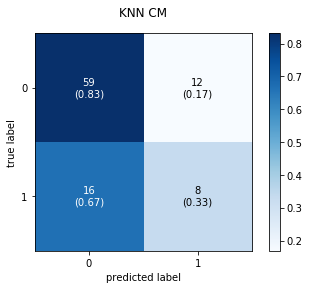

In [113]:
from mlxtend.plotting import plot_confusion_matrix
binary = np.array([[59 ,12],
 [16, 8]])

fig, ax = plot_confusion_matrix(conf_mat=binary,
                                show_absolute=True,
                                show_normed=True,
                                colorbar=True)
plt.title("KNN CM")
plt.show()

### Gradient Boost

In [115]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV

gbc = GradientBoostingClassifier(random_state=42)
boost = {
    "n_estimators":[1,2,5,10,20,50,100,150,200,500,1000,2000,5000],
    "max_depth":[1,3,5,7,9],
    "learning_rate":[0.01,0.1,0.001,0.005,0.9,0.2,0.5]
}

grid_search_gb = GridSearchCV(gbc,boost,cv=3,verbose=5,scoring="f1",n_jobs=-1)

In [116]:
grid_search_gb.fit(X_train, y_train)
grid_search_gb.best_params_

Fitting 3 folds for each of 455 candidates, totalling 1365 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  82 tasks      | elapsed:    2.1s
[Parallel(n_jobs=-1)]: Done 255 tasks      | elapsed:   16.7s
[Parallel(n_jobs=-1)]: Done 393 tasks      | elapsed:   24.8s
[Parallel(n_jobs=-1)]: Done 558 tasks      | elapsed:   37.7s
[Parallel(n_jobs=-1)]: Done 756 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 990 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 1260 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done 1365 out of 1365 | elapsed:  1.7min finished


{'learning_rate': 0.9, 'max_depth': 3, 'n_estimators': 1}

In [117]:
grid_search_gb.best_score_

0.3859911406423034

In [118]:
grid_search_gb.score(X_test,y_test)

0.2702702702702703

In [119]:
# Visualise classical Confusion M0atrix
from sklearn.metrics import confusion_matrix
gb_grid = grid_search_gb.predict(X_test)
gb_cm = confusion_matrix(y_test, gb_grid)

print(gb_cm)

[[63  8]
 [19  5]]


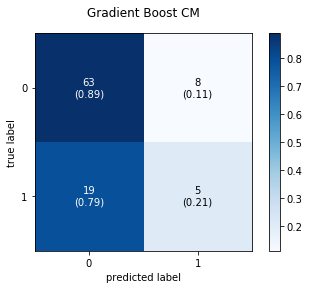

In [120]:
from mlxtend.plotting import plot_confusion_matrix
binary = np.array([[63 , 8],
 [19 , 5]])

fig, ax = plot_confusion_matrix(conf_mat=binary,
                                show_absolute=True,
                                show_normed=True,
                                colorbar=True)
plt.title("Gradient Boost CM")
plt.show()

### ROC Curves

No Skill: ROC AUC=0.500
Logistic: ROC AUC=0.629
RF: ROC AUC=0.673
SVM: ROC AUC=0.690


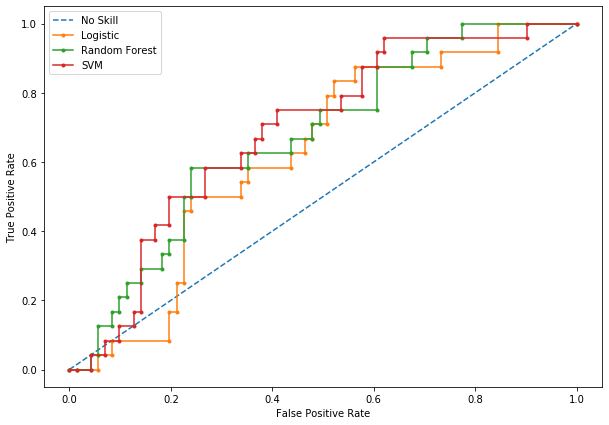

In [83]:
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot

pyplot.figure(figsize=(10,7))

# generate 3 class dataset
ns_probs = [0 for _ in range(len(y_test))]
lr_probs = grid_searchlgr.predict_proba(X_test)
rf_probs = grid_searchrf.predict_proba(X_test)
svm_probs = svmgridsearch.predict_proba(X_test)

# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
rf_probs = rf_probs[:, 1]
svm_probs = svm_probs[:, 1]

# calculate scores
ns_auc = roc_auc_score(y_test, ns_probs)
lr_auc = roc_auc_score(y_test, lr_probs)
rf_auc = roc_auc_score(y_test, rf_probs)
svm_auc = roc_auc_score(y_test, svm_probs)

# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Logistic: ROC AUC=%.3f' % (lr_auc))
print('RF: ROC AUC=%.3f' % (rf_auc))
print('SVM: ROC AUC=%.3f' % (svm_auc))

# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)
rf_fpr, rf_tpr, _ = roc_curve(y_test, rf_probs)
svm_fpr, svm_tpr, _ = roc_curve(y_test, svm_probs)

# plot the roc curve for the model
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='Logistic')
pyplot.plot(rf_fpr, rf_tpr, marker='.', label='Random Forest')
pyplot.plot(svm_fpr, svm_tpr, marker='.', label='SVM')

# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

No Skill: ROC AUC=0.500
AdaBoost: ROC AUC=0.726
KNN: ROC AUC=0.627
Gradient Boost: ROC AUC=0.705


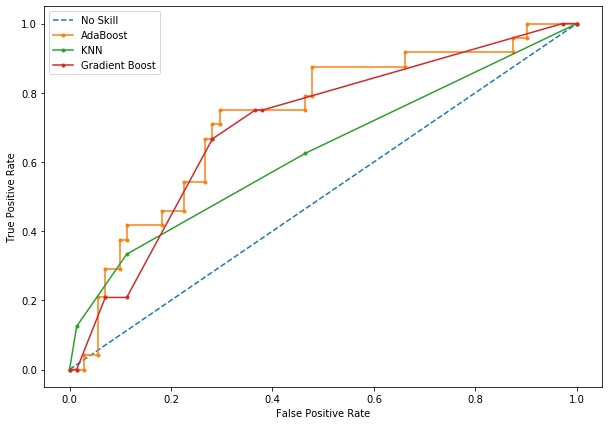

In [114]:
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot

pyplot.figure(figsize=(10,7))
ns_probs = [0 for _ in range(len(y_test))]
ada_probs = grid_search_ABR.predict_proba(X_test)
knn_probs = grid_search_knn.predict_proba(X_test)
gb_probs = grid_search_gb.predict_proba(X_test)

ada_probs = ada_probs[:, 1]
knn_probs = knn_probs[:, 1]
gb_probs = gb_probs[:, 1]

ns_auc = roc_auc_score(y_test, ns_probs)
ada_auc = roc_auc_score(y_test, ada_probs)
knn_auc = roc_auc_score(y_test, knn_probs)
gb_auc = roc_auc_score(y_test, gb_probs)

print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('AdaBoost: ROC AUC=%.3f' % (ada_auc))
print('KNN: ROC AUC=%.3f' % (knn_auc))
print('Gradient Boost: ROC AUC=%.3f' % (gb_auc))

ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
ada_fpr, ada_tpr, _ = roc_curve(y_test, ada_probs)
knn_fpr, knn_tpr, _ = roc_curve(y_test, knn_probs)
gb_fpr, gb_tpr, _ = roc_curve(y_test, gb_probs)

pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
pyplot.plot(ada_fpr, ada_tpr, marker='.', label='AdaBoost')
pyplot.plot(knn_fpr, knn_tpr, marker='.', label='KNN')
pyplot.plot(gb_fpr, gb_tpr, marker='.', label='Gradient Boost')

pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()
